# Overfitting

## Introduction

While exploring regression, we've briefly mentioned overfitting and the problems it can cause. In this mission, we'll explore how to identify overfitting and what you can do to avoid it. To explore overfitting, we'll use a dataset on cars which dataset contains 7 numerical features that could have an effect on a car's fuel efficiency:

* `cylinders` -- the number of [cylinders](http://bit.ly/29zLo9A) in the engine.
* `displacement` -- the [displacement](https://en.wikipedia.org/wiki/Engine_displacement) of the engine.
* `horsepower` -- the [horsepower](http://bit.ly/29sDwVU) of the engine.
* `weight` -- the weight of the car.
* `acceleration` -- the acceleration of the car.
* `model year` -- the year that car model was released (e.g. `70` corresponds to `1970`).
* `origin` -- where the car was manufactured (`0` if North America, `1` if Europe, `2` if Asia).

The `mpg` column is our target column and is the one we want to predict using the other features.

* The dataset is hosted by the University of California Irvine on [their machine learning repository](https://archive.ics.uci.edu/ml/datasets/Auto+MPG).

In [3]:
import pandas as pd
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("data/auto-mpg.data", delim_whitespace=True, names=columns)

filtered_cars = cars[cars['horsepower'] != '?']
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Bias and Variance

### At the heart of understanding overfitting is understanding bias and variance. 
Bias and variance make up the 2 observable sources of error in a model that we can indirectly control.<br>

**Bias** describes error that results in bad assumptions about the learning algorithm. 
* For example, assuming that only one feature, like a car's weight, relates to a car's fuel efficiency will lead you to fit a simple, univariate regression model that will result in high bias.
* The error rate will be high since a car's fuel efficiency is affected by many other factors besides just its weight.

**Variance** describes error that occurs because of the variability of a model's predicted values.
* If we were given a dataset with 1000 features on each car and used every single feature to train an incredibly complicated multivariate regression model, we will have low bias but high variance.

In an ideal world, we want low bias and low variance but in reality, there's always a tradeoff.

## Bias-variance tradeoff

We've discussed before how overfitting generally happens when a model performs well on a training set but doesn't generalize well to new data. A key nuance here is that you should think of overfitting as a relative term. Between any 2 models, one will overfit more than the other one.<br>

Understanding the [bias variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) is critical to understanding overfitting. Every process has some amount of inherent noise that's unobservable. Overfit models tend to capture the noise as well as the signal in a dataset.<br>

Scott Fortman Roe's [blog post on the bias-variance tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html) has a wonderful image that describes this tradeoff:

![http://i.imgur.com/2xqTu46.png](http://i.imgur.com/2xqTu46.png)

We can approximate the bias of a model by training a few different models from the same class (linear regression in this case) using different features on the same dataset and calculating their error scores. For regression, we can use mean absolute error, mean squared error, or R-squared.<br>

We can calculate the variance of the predicted values for each model we train and we'll observe an increase in variance as we build more complex, multivariate models.<br>

While an extremely simple, univariate linear regression model will underfit, an extremely complicated, multivariate linear regression model will overfit. Depending on the problem you're working on, there's a happy middle ground that will help you construct reliable and useful predictive models.<br>

Let's first create a function that we can use for training the model and computing the bias and variance values and use it to train some simple, univariate models.

Create a function named `train_and_test` that:

* Takes in a list of column names in `filtered_cars` as the sole parameter (`cols`),
  * Trains a linear regression model using:
    * The columns in `cols` as the features,
    * The `mpg` column as the target variable.
* Uses the trained model to make predictions using the same input it was trained on,
* Computes the variance of the predicted values and the mean squared error between the predicted values and the actual label (`mpg` column).
* Returns the mean squared error value followed by the variance (e.g. `return(mse, variance)`).

Use the `train_and_test` function to train a model using only the `cylinders` column. Assign the resulting mean squared error value and variance to `cyl_mse` and `cyl_var`.<br>

Use the `train_and_test` function to train a model using only the `weight` column. Assign the resulting mean squared error value and variance to `weight_mse` and `weight_var`.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [7]:
filtered_cars['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
5      15.0
6      14.0
7      14.0
8      14.0
9      15.0
10     15.0
11     14.0
12     15.0
13     14.0
14     24.0
15     22.0
16     18.0
17     21.0
18     27.0
19     26.0
20     25.0
21     24.0
22     25.0
23     26.0
24     21.0
25     10.0
26     10.0
27     11.0
28      9.0
29     27.0
       ... 
367    28.0
368    27.0
369    34.0
370    31.0
371    29.0
372    27.0
373    24.0
375    36.0
376    37.0
377    31.0
378    38.0
379    36.0
380    36.0
381    36.0
382    34.0
383    38.0
384    32.0
385    38.0
386    25.0
387    38.0
388    26.0
389    22.0
390    32.0
391    36.0
392    27.0
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [8]:
def train_and_test(cols):
    
    X = filtered_cars[cols]
    y = filtered_cars['mpg']
    
    model = LinearRegression()
    model.fit(X, y)
    
    var = model.predict(X).var()
    mse = mean_squared_error(model.predict(X), y)
    
    return (mse, var)

In [9]:
cyl_mse, cyl_var = train_and_test(['cylinders'])
weight_mse, weight_var = train_and_test(['weight'])

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


## Multivariate models

Now that we have a function for training a regression model and calculating the mean squared error and variance, let's use it to train and understand more complex models.



Use the train_and_test function to train linear regression models using the following columns as the features:

* columns: cylinders, displacement.
  * MSE: two_mse, variance: two_var.
* columns: cylinders, displacement, horsepower.
  * MSE: three_mse, variance: three_var.
* columns: cylinders, displacement, horsepower, weight.
  * MSE: four_mse, variance: four_var.
* columns: cylinders, displacement, horsepower, weight, acceleration.
  * MSE: five_mse, variance: five_var.
* columns: cylinders, displacement, horsepower, weight, acceleration, model year
  * MSE: six_mse, variance: six_var.
* columns: cylinders, displacement, horsepower, weight, acceleration, model year, origin
  * MSE: seven_mse, variance: seven_var.

Use `print` statements or the variable inspector to display each value.

In [15]:
one_mse, one_var = train_and_test(["cylinders"])

In [12]:
cols_two = ['cylinders', 'displacement']
cols_three = cols_two+['horsepower']
cols_four = cols_three+['weight']
cols_five = cols_four+['acceleration']
cols_six = cols_five+['model year']
cols_seven = cols_six+['origin']

In [16]:
two_mse, two_var = train_and_test(cols_two)
three_mse, three_var = train_and_test(cols_three)
four_mse, four_var = train_and_test(cols_four)
five_mse, five_var = train_and_test(cols_five)
six_mse, six_var = train_and_test(cols_six)
seven_mse, seven_var = train_and_test(cols_seven)

In [14]:
print(two_mse, two_var)
print(three_mse, three_var)
print(four_mse, four_var)
print(five_mse, five_var)
print(six_mse, six_var)
print(seven_mse, seven_var)

21.2820570556 39.4806813867
20.2529548397 40.5097836026
17.7638605718 42.9988778705
17.7613961054 43.0013423369
11.5901709814 49.1725674609
10.847480945 49.9152574973


## Cross validation

The multivariate regression models you trained got progressively better at reducing the amount of error.<br>

A good way to detect if your model is overfitting is to compare the **in-sample error** and the **out-of-sample error**, or the training error with the test error. So far, we calculated the in sample error by testing the model over the same data it was trained on. To calculate the out-of-sample error, we need to test the data on a test set of data. We unfortunately don't have a separate test dataset and we'll instead use cross validation.<br>

If a model's cross validation error (out-of-sample error) is much higher than the in sample error, then your data science senses should start to tingle. This is the first line of defense against overfitting and is a clear indicator that the trained model doesn't generalize well outside of the training set.<br>

Let's create a new function to handle performing the cross validation and computing the cross validation error.

Create a function named `train_and_cross_val` that:

* takes in a single parameter (list of column names),
* trains a linear regression model using the features specified in the parameter,
* uses the KFold class to perform 10-fold validation using a random seed of 3 (we use this seed to answer check your code),
* calculates the mean squared error across all folds and the mean variance across all folds.
* returns the mean squared error value then the variance using a multiple return statement (e.g. return(avg_mse, avg_var)).

Use the train_and_cross_val function to train linear regression models using the following columns as the features:

* the cylinders and displacement columns. Assign the resulting mean squared error value to two_mse and the resulting variance value to two_var.
* the cylinders, displacement, and horsepower columns. Assign the resulting mean squared error value to three_mse and the resulting variance value to three_var.
* the cylinders, displacement, horsepower, and weight columns. Assign the resulting mean squared error value to four_mse and the resulting variance value to four_var.
* the cylinders, displacement, horsepower, weight, acceleration columns. Assign the resulting mean squared error value to five_mse and the resulting variance value to five_var.
* the cylinders, displacement, horsepower, weight, acceleration, and model year columns. Assign the resulting mean squared error value to six_mse and the resulting variance value to six_var.
* the cylinders, displacement, horsepower, weight, acceleration, model year, and origin columns. Assign the resulting mean squared error value to seven_mse and the resulting variance value to seven_var.

Use the variable display to inspect each value.

In [17]:
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
def train_and_cross_val(cols):
    
    X = filtered_cars[cols]
    y = filtered_cars['mpg']
    kf = KFold(n=filtered_cars.shape[0], n_folds=10,\
                     shuffle=True, random_state=3)
    
    mses, variances = [], []
    for train_idx, test_idx in kf:
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        
        mses.append(mean_squared_error(pred, y_test))
        variances.append(pred.var())
    
    return np.mean(mses), np.mean(variances)
    

In [37]:
two_mse, two_var = train_and_cross_val(cols_two)
three_mse, three_var = train_and_cross_val(cols_three)
four_mse, four_var = train_and_cross_val(cols_four)
five_mse, five_var = train_and_cross_val(cols_five)
six_mse, six_var = train_and_cross_val(cols_six)
seven_mse, seven_var = train_and_cross_val(cols_seven)

In [38]:
print(two_mse, two_var)
print(three_mse, three_var)
print(four_mse, four_var)
print(five_mse, five_var)
print(six_mse, six_var)
print(seven_mse, seven_var)

21.584370275 38.9025253138
20.6556221939 40.0912879566
18.1696832391 42.5076436436
18.2830385172 42.5987363001
12.0996854255 48.9282469677
11.4181319718 49.904313731


## Plotting cross-validation error vs. cross-validation variance

During cross validation, the more features we added to the model, the lower the mean squared error got. This is a good sign and indicates that the model generalizes well to new data it wasn't trained on. As the mean squared error value went down, however, the variance of the predictions went up. This is to be expected, since the models with lower squared error values had higher model complexity, which tends to be more sensitive to small variations in input values (or high variance).<br>

For each model, let's plot the error and variance to get a better idea of the tradeoff as the number of features increased.

On the same Axes instance:

* Generate a scatter plot with the model's number of features on the x-axis and the model's overall, cross-validation mean squared error on the y-axis. Use `red` for the scatter dot color.
* Generate a scatter plot with the model's number of features on the x-axis and the model's overall, cross-validation variance on the y-axis. Use `blue` for the scatter dot color.
Use `plt.show()` to display the scatter plot.

In [44]:
mses = [two_mse, three_mse, four_mse, five_mse, six_mse, seven_mse]
variances = [two_var, three_var, four_var, five_var, six_var, seven_var]

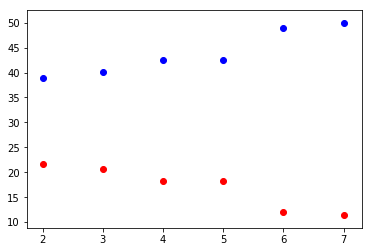

In [46]:
fig, ax = plt.subplots()

for i, (mse, var) in enumerate(zip(mses, variances)):
    
    ax.scatter(i+2, mse, c='r')
    ax.scatter(i+2, var, c='b')

plt.show()

## Conclusion

While the higher order multivariate models overfit in relation to the lower order multivariate models, the in-sample error and out-of-sample didn't deviate by much. The best model was around **50%** more accurate than the simplest model. On the other hand, the overall variance increased around **25%** as we increased the model complexity. This is a really good starting point, but your work is not done! The increased variance with the increased model complexity means that your model will have more unpredictable performance on truly new, unseen data.<br>

If you were working on this problem on a data science team, you'd need to confirm the predictive accuracy of the model using completely new, unobserved data (e.g. maybe from cars from later years). Since often you can't wait until a model is deployed in the wild to know how well it works, the exploration we did in this mission helps you approximate a model's real world performance.

## Next Steps
In this mission, we explored overfitting at a deeper level and introduced related terminology that you'll see in other literature as well. So far, we've mostly dealt with supvervised machine learning models to solve regression and classification problems. In the next mission, we'll explore an **unsupervised machine learning** technique called **k-means clustering**.